In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

### Import Dataset and see several columns

In [109]:
dataset = pd.read_excel('StoreDataset.xls')
dataset.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


Filter dataset to show only Furniture category

In [110]:
furniture_data = dataset.loc[dataset['Category'] == 'Furniture']
furniture_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [111]:
furniture_data['Order Date'].min(), furniture_data['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Data Pre-processing

Drop columns that will not be used for the next process

In [112]:
drop_cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture_data.drop(drop_cols, axis=1, inplace=True)

Check if there is missing value on columns

In [113]:
furniture_data = furniture_data.sort_values('Order Date')
furniture_data.isnull().sum()

Order Date    0
Sales         0
dtype: int64

### Index with Time Series Data

In [114]:
furniture_data = furniture_data.groupby('Order Date')['Sales'].sum().reset_index()
furniture_data.shape

(889, 2)

In [115]:
furniture_data = furniture_data.set_index('Order Date')
furniture_data

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [127]:
newdata = pd.DataFrame(furniture_data['Sales'].resample('MS').mean())
# Output average sales per month in 2015
newdata['2015':'2015']

,Sales
Order Date,
2015-01-01,978.328467
2015-02-01,522.395667
2015-03-01,781.236437
2015-04-01,805.822962
2015-05-01,624.996700
2015-06-01,428.565500
2015-07-01,719.706316
2015-08-01,602.412012
2015-09-01,1382.790684


### Visualizing Furniture Sales Time Series Data

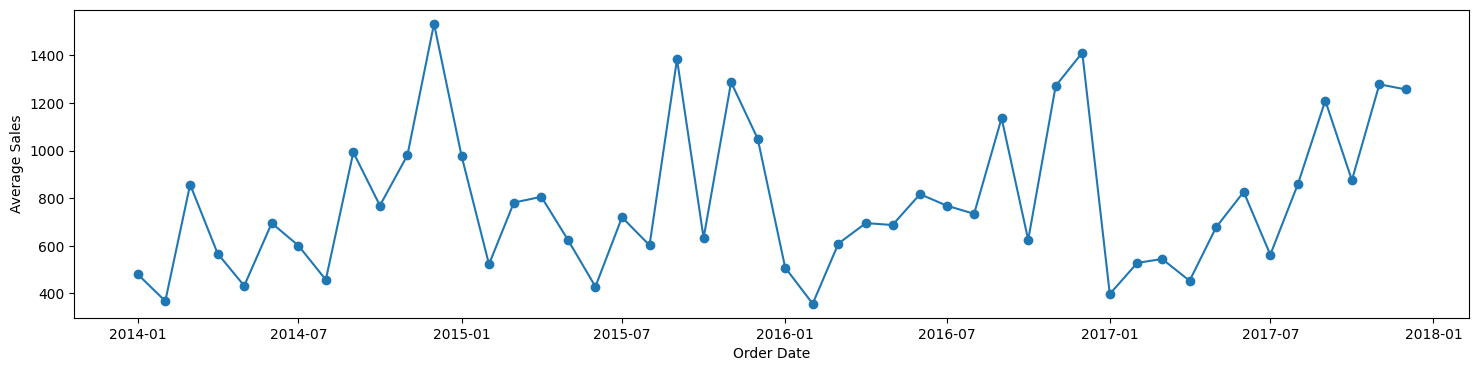

In [117]:
plt.figure(figsize=(18,4))
plt.plot(newdata, marker='o')
plt.xlabel('Order Date')
plt.ylabel('Average Sales')
plt.show()

Visualize the trend, seasonality, and noise of Time Series Data

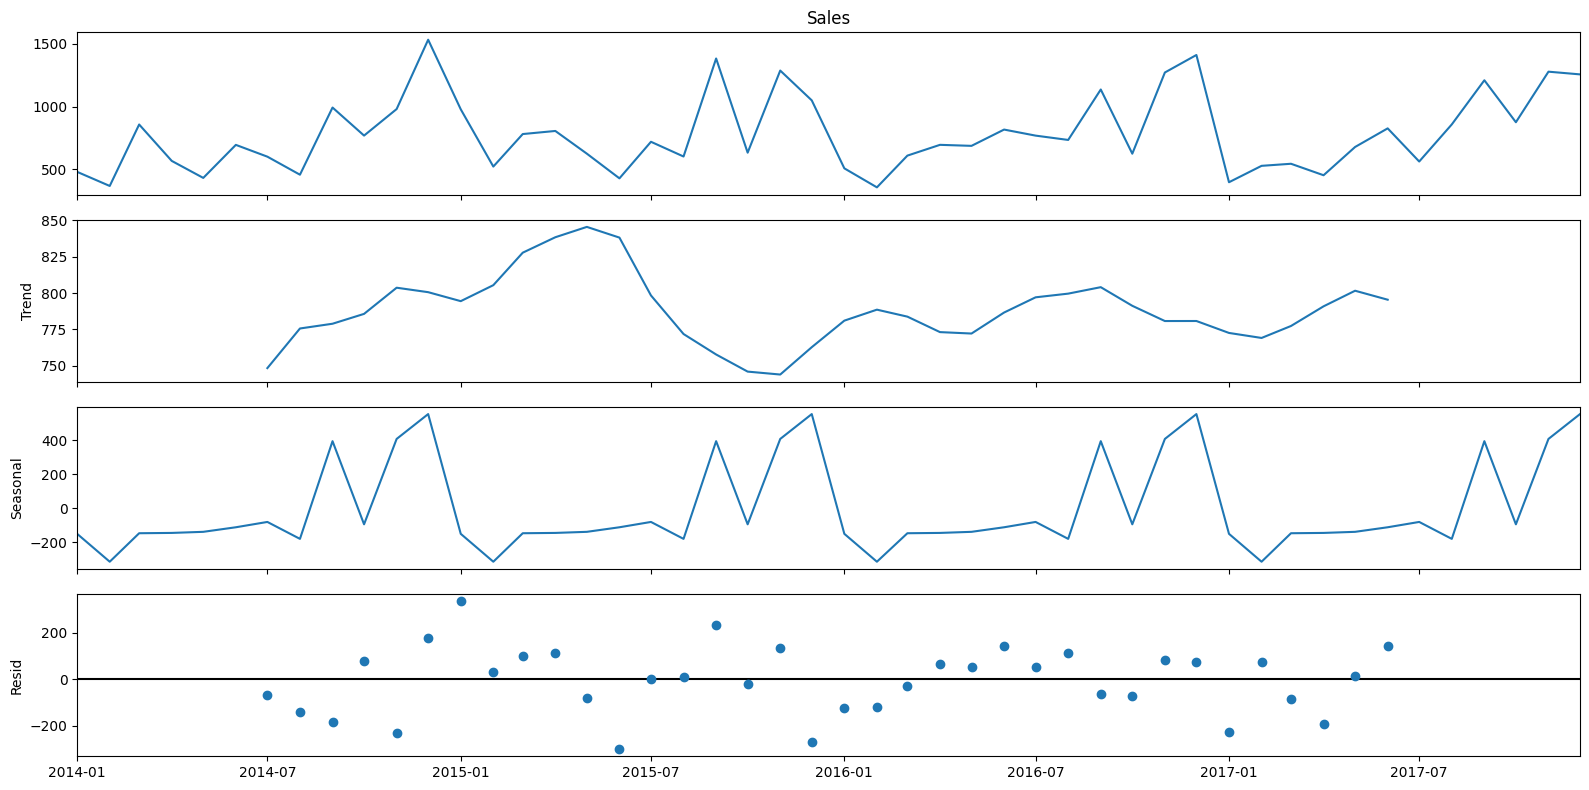

In [118]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

data_ts = sm.tsa.seasonal_decompose(newdata, model='additive')

# Visualize data
visualize = data_ts.plot()
plt.show()

### Do Time Series Forecasting using ARIMA

Make some parameter combinations for ARIMA model

In [119]:
p = d = q =range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Example parameter combinations for ARIMA
print(f'ARIMA Params: {pdq[1]} x {seasonal_pdq[1]}')
print(f'ARIMA Params: {pdq[2]} x {seasonal_pdq[2]}')

ARIMA Params: (0, 0, 1) x (0, 0, 1, 12)
ARIMA Params: (0, 1, 0) x (0, 1, 0, 12)


Using Grid Search for choose good parameter

In [120]:
AIC = []
params = []
season_params = []

for params in pdq:
    for params_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(
                newdata,
                order=params,
                seasonal_order=params_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = model.fit()
            print(f'ARIMA {params} x {params_seasonal}12 -- AIC : {results.aic}')
            AIC.append(results.aic)
        except:
            continue

print(f'\n\nMinimal AIC value on index {AIC.index(min(AIC))} : {min(AIC)}')

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 -- AIC : 769.0817523205915
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 -- AIC : 1457.5412534942598
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 -- AIC : 477.7170130919703
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 -- AIC : 302.27028997935736
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 -- AIC : 497.2314433418338
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 -- AIC : 1179.6903776415356
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 -- AIC : 318.0047199116341
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 -- AIC : 304.24882803033336
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 -- AIC : 720.9252270758095
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 -- AIC : 2621.5327370301484
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 -- AIC : 466.56074298091517
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 -- AIC : 291.62613896732915
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 -- AIC : 499.5634719720483
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 -- AIC : 2556.28914808803
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 -- AIC : 319.9884876946868
ARIMA (0, 0, 1) x (1, 1, 1, 12)12 -- AIC : 291.8725576454926
ARIMA (0, 1, 0) x 

See model summary

In [121]:
# (0, 1, 1) x (0, 1, 1, 12)12
model = sm.tsa.statespace.SARIMAX(
            newdata,
            order=(0, 1, 1),
            seasonal_order=(0, 1, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        )

results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   3992.102     -0.000      1.000   -7825.377    7823.377
ma.S.L12      -3.2469      1.665     -1.950      0.051      -6.510       0.016
sigma2      2368.6842   9.46e+06      0.000      1.000   -1.85e+07    1.85e+07


### Validating Forecasts

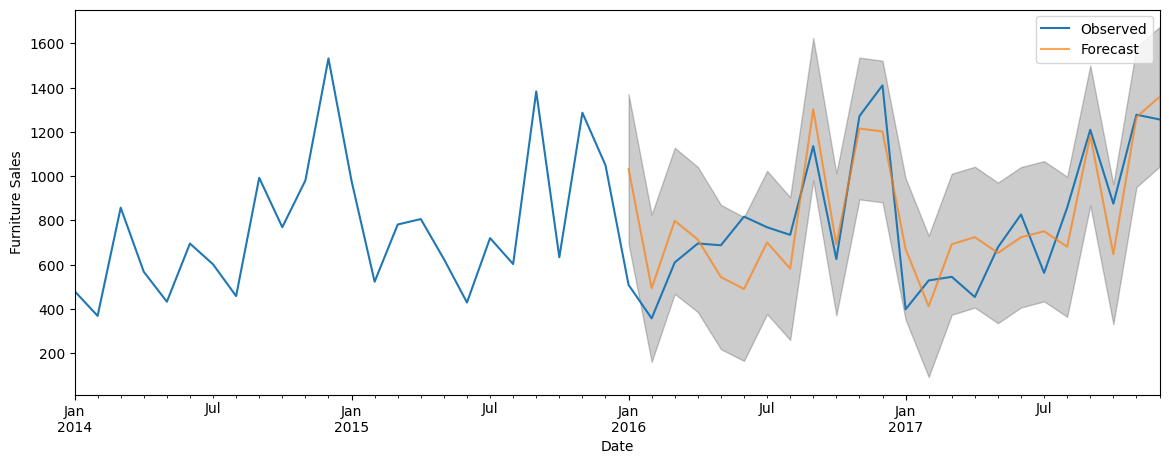

In [122]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = newdata['2014':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

### Evaluation Metric from Forecasts

In [123]:
data_forecasted = pred.predicted_mean
data_truth = newdata['2016-01-01':]

mse = ((data_forecasted - data_truth) ** 2).mean()

print(f'MSE of forecasts : {round(mse, 2)}')
print(f'RMSE of forecasts : {round(np.sqrt(mse), 2)}')

MSE of forecasts : 37053.32
RMSE of forecasts : 192.49


### Produce & Visualize Forecasts for next few years

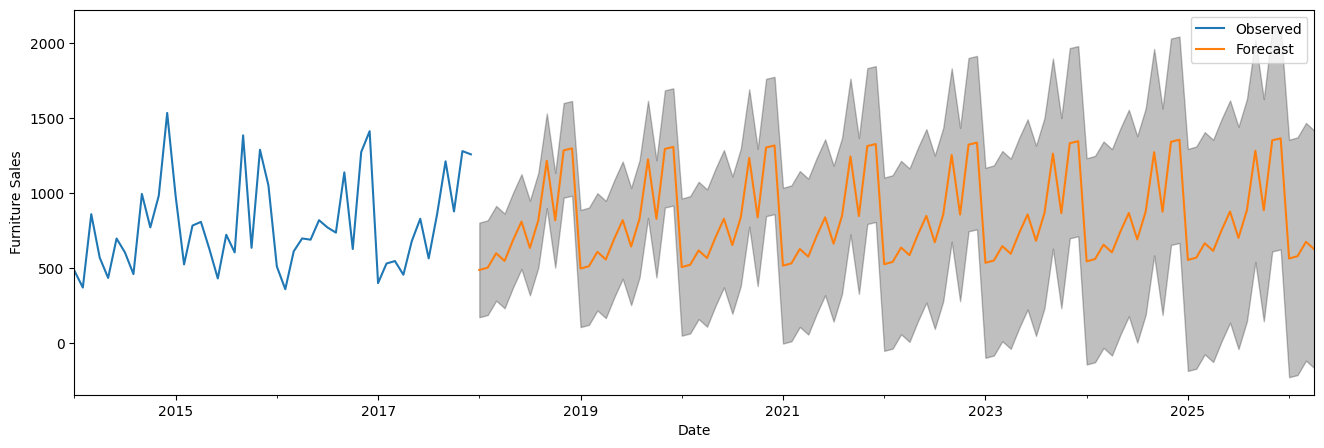

In [124]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = newdata.plot(label='Observed', figsize=(16, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()